# EDA of Movies Revenue Data
## Introduction
In this notebook, I will be performing an exploratory data analysis on the book sales data. The dataset contains information about the revenue of Movies from different years.

First I'll import all the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

Now I'll load the data and take a look at the first few rows of the data.

In [2]:
movies = pd.read_csv('Data/Movies_MetaData_ETL.csv', index_col=0)
ratings = pd.read_csv('Data/Ratings_ETL.csv', index_col=0)

In [3]:
movies.head()

,belongs_to_collection,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",3.000000e+07,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862.0,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,Unknown,6.500000e+07,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844.0,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,2.627972e+08,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",4.240017e+06,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602.0,11.712900,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,1.124993e+07,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,Unknown,1.600000e+07,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357.0,3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,8.145216e+07,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",4.240017e+06,"[{'id': 35, 'name': 'Comedy'}]",11862.0,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,7.657891e+07,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0


I'm trying to answer the following questions:
1. Which genre has the highest revenue?
2. What is the average revenue of movies in each genre?
3. What of the rest of the columns has the most correlation with revenue?

## Which genre has the highest revenue?

To answer this question, I'll group the data by genre and sum the revenue for each genre. Then I'll plot the data to visualize the results.

In [4]:
genre_revenue = {}

for index, row in movies.iterrows():
    genres = ast.literal_eval(row['genres'])
    revenue = row['revenue']
    
    for genre in genres:
        genre_name = genre['name']
        if genre_name in genre_revenue:
            genre_revenue[genre_name] += revenue
        else:
            genre_revenue[genre_name] = revenue

genre_revenue_df = pd.DataFrame(list(genre_revenue.items()), columns=['Genre', 'Revenue'])

C:\Users\biott\AppData\Local\Temp\ipykernel_16728\1629341075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Revenue', data=genre_revenue_df, palette='viridis', order=genre_revenue_df.sort_values('Revenue', ascending=False).Genre)


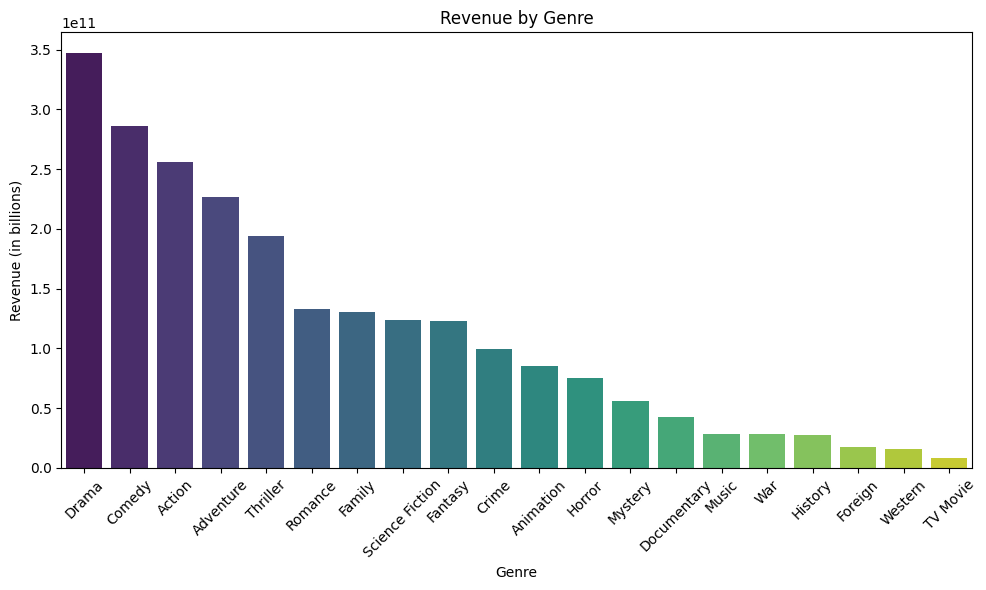

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Revenue', data=genre_revenue_df, palette='viridis', order=genre_revenue_df.sort_values('Revenue', ascending=False).Genre)
plt.title('Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On the plot above we can see that the genre with the highest revenue is Drama, followed by Comedy and Action.

## What is the average revenue of movies in each genre?

To answer this question, I'll group the data by genre and get the average revenue for each genre. Then I'll plot the data to visualize the results.

In [6]:
# Initialize a dictionary to store the total revenue and count of movies for each genre
genre_revenue_count = {}

# Iterate through each row in the movies dataframe
for index, row in movies.iterrows():
    genres = ast.literal_eval(row['genres'])
    revenue = row['revenue']
    
    for genre in genres:
        genre_name = genre['name']
        if genre_name in genre_revenue_count:
            genre_revenue_count[genre_name]['total_revenue'] += revenue
            genre_revenue_count[genre_name]['count'] += 1
        else:
            genre_revenue_count[genre_name] = {'total_revenue': revenue, 'count': 1}

# Calculate the average revenue for each genre
avg_revenue_data = {
    'Genre': [],
    'Avg_Revenue': []
}

# Initialize a dictionary to store the count of movies for each genre
genre_movie_count = {
    'Genre': [],
    'Movie_Count': []
}

for genre, data in genre_revenue_count.items():
    avg_revenue_data['Genre'].append(genre)
    avg_revenue_data['Avg_Revenue'].append(data['total_revenue'] / data['count'])
    genre_movie_count['Genre'].append(genre)
    genre_movie_count['Movie_Count'].append(data['count'])

# Create a new dataframe with the average revenue for each genre
avg_revenue_df = pd.DataFrame(avg_revenue_data)

# Create a new dataframe with the count of movies for each genre
genre_movie_count_df = pd.DataFrame(genre_movie_count)

C:\Users\biott\AppData\Local\Temp\ipykernel_16728\675274268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Avg_Revenue', data=avg_revenue_df, palette='viridis', order=avg_revenue_df.sort_values('Avg_Revenue', ascending=False).Genre)


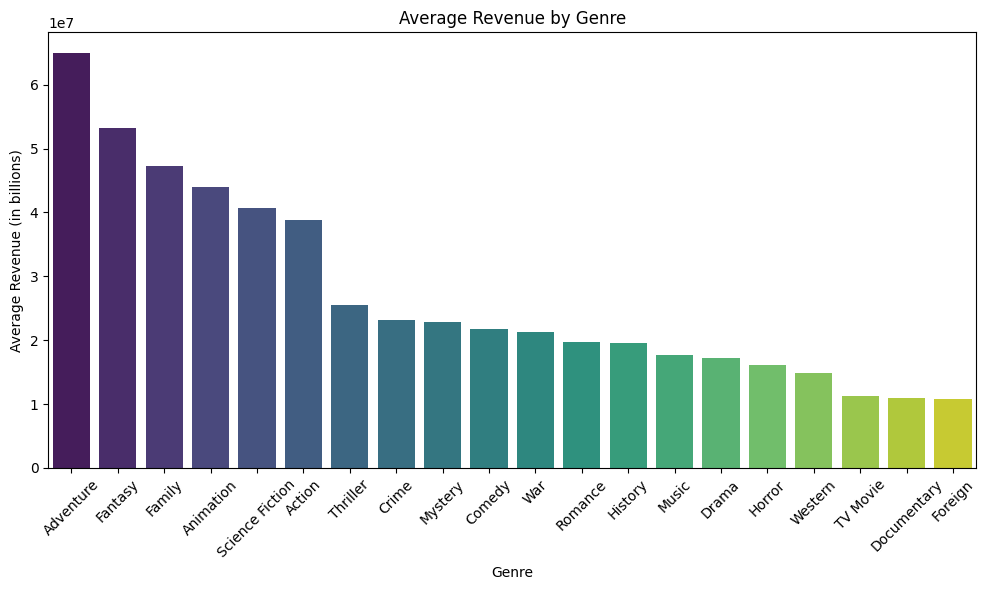

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Avg_Revenue', data=avg_revenue_df, palette='viridis', order=avg_revenue_df.sort_values('Avg_Revenue', ascending=False).Genre)
plt.title('Average Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue (in billions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

On the plot above we can see that the genre with the highest average revenue is Adventure with a big margin, followed by Fantasy, Family, Animation, Science Fiction and Action.

C:\Users\biott\AppData\Local\Temp\ipykernel_16728\562560749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Movie_Count', data=genre_movie_count_df, palette='viridis', order=avg_revenue_df.sort_values('Avg_Revenue', ascending=False).Genre)


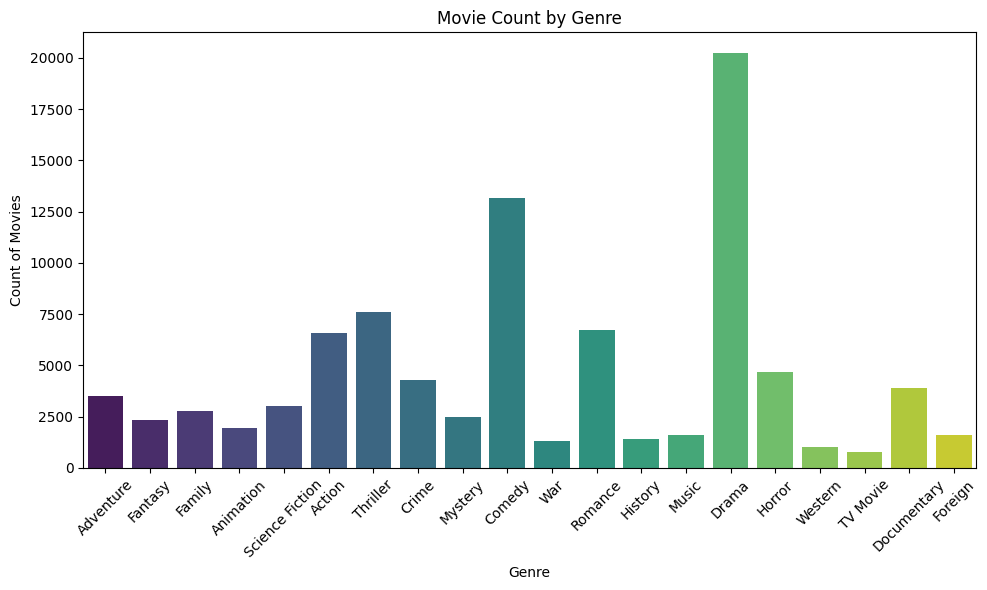

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Movie_Count', data=genre_movie_count_df, palette='viridis', order=avg_revenue_df.sort_values('Avg_Revenue', ascending=False).Genre)
plt.title('Movie Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now with the context of this new plot we can see that the genres with the highest average revenue don't have as many movies in their catalogue as other genres do. This might be making the average revenue lower in some genres that have a lot of movies.

## Which, of the rest of the columns, has the most correlation with the revenue?

To answer this question, I'll calculate the correlation between the revenue and the rest of the columns. Then I'll plot the data to visualize the results.

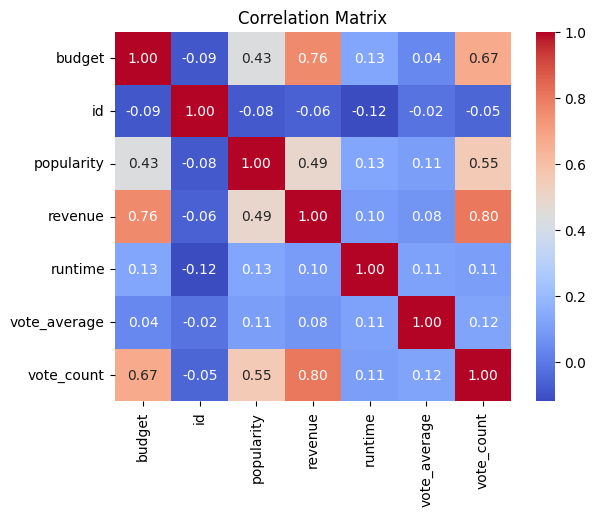

In [9]:
# Calculate the correlation between revenue and other columns
numeric_columns = movies.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

With this plot we can see that the column with the most correlation with revenue is the budget column, followed by the vote_count column and the popularity column.